# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas','2.2.3')
    requirements_generator.add_package('numpy','1.26.4')
    requirements_generator.add_package('torch','2.5.1')
    requirements_generator.add_package('h5py','3.12.1')
    requirements_generator.add_package('matplotlib','3.9.3')
    requirements_generator.add_package('opencv-python-headless','4.10.0.84')
    requirements_generator.add_package('scipy','1.13.1')


#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2
from scipy.stats import gaussian_kde

#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_topcoverage_auc')
    manifest_genenerator.set_ait_description('画像データセットにおける物体の面積比率、平均明度、および物体の中心座標の原点からの距離のそれぞれの分布のデータ密度が高い領域から考えて、上位p%の領域の面積をSとする。pの値を0から1に変化させたときの面積Sの変化を確認することでデータの均一性を判断する。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_topcoverage_auc')
    manifest_genenerator.set_ait_version('1.0')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('AUC')
    manifest_genenerator.add_ait_keywords('TopCoverage')
    manifest_genenerator.add_ait_keywords('image')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-2データセットの均一性')
    #### Inventories
    inventory_requirement_dataset = manifest_genenerator.format_ait_inventory_requirement(format_=['h5'])
    manifest_genenerator.add_ait_inventories(name='train_dataset', 
                                             type_='dataset', 
                                             description='HDF5形式の学習用の画像データセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される[-1,1]に正規化されている多次元配列を含むデータセット(データセット(1)の要素数はmodelの入力層の要素数と一致)\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はmodelの出力層の要素数と一致))\nファイル構造:\n sample.h5\n   ├(1)入力データセット\n   └(2)ラベルデータセット\n', 
                                             requirement= inventory_requirement_dataset)
    manifest_genenerator.add_ait_inventories(name='test_dataset', 
                                             type_='dataset', 
                                             description='HDF5形式のテスト用の画像データセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される[-1,1]に正規化されている多次元配列を含むデータセット(データセット(1)の要素数はmodelの入力層の要素数と一致)\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はmodelの出力層の要素数と一致))\nファイル構造:\n sample.h5\n   ├(1)入力データセット\n   └(2)ラベルデータセット\n', 
                                             requirement= inventory_requirement_dataset)
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='train_input_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されているデータセット(1)の名前', 
                                            default_val='x_train')
    manifest_genenerator.add_ait_parameters(name='train_label_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されているデータセット(2)の名前', 
                                            default_val='y_train')
    manifest_genenerator.add_ait_parameters(name='test_input_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(1)の名前', 
                                            default_val='x_test')
    manifest_genenerator.add_ait_parameters(name='test_label_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(2)の名前', 
                                            default_val='y_test')
    manifest_genenerator.add_ait_parameters(name='kde_bandwidth',
                                            type_='float',
                                            default_val='0.5',
                                            min_value='0.1',
                                            max_value='1',
                                            description='データの分布を計算するときのカーネル密度推定に指定するバンド幅')
    manifest_genenerator.add_ait_parameters(name='dataset_channel',
                                            type_='int',
                                            description='train_dataset inventoryで説明されているデータセットとtest_dataset inventoryで説明されているデータセットのチャネル数(グレースケール画像の場合1、RGB画像の場合3)')
    #### Measures
    manifest_genenerator.add_ait_measures(name='train_Area_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用データセットの各クラスごとの面積比率のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='train_Brightness_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用データセットの各クラスごとの平均明度のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='train_Center_Coordinates_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用データセットの各クラスごとの中心座標の原点からの距離のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Area_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用データセットの各クラスごとの面積比率のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Brightness_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用データセットの各クラスごとの平均明度のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Center_Coordinates_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用データセットの各クラスごとの中心座標の原点からの距離のTopcoverageのAUC.値が1に近いほどデータが均一である')
    #### Resources
    manifest_genenerator.add_ait_resources(name='train_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='学習用データセットの密度プロット（物体の面積比率、平均明度、物体の中心座標の原点からの距離）の曲線のプロット')
    manifest_genenerator.add_ait_resources(name='test_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='テスト用データセットの密度プロット（物体の面積比率、平均明度、物体の中心座標の原点からの距離）の曲線のプロット')

    manifest_genenerator.add_ait_resources(name='train_distribution_table', 
                                          type_='table', 
                                          description='学習用データセットの面積比率、平均明度、物体の中心座標の原点からの距離の分布表')
    manifest_genenerator.add_ait_resources(name='test_distribution_table', 
                                          type_='table', 
                                          description='テスト用データセットの面積比率、平均明度、物体の中心座標の原点からの距離の分布表')

    #### Downloads
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='train_dataset',
                                        value='mnist_data/aug_train.h5')
    input_generator.add_ait_inventories(name='test_dataset',
                                        value='mnist_data/aug_test.h5')
    input_generator.set_ait_params("train_input_dataset_name", "train_image")
    input_generator.set_ait_params("train_label_dataset_name", "train_label")
    input_generator.set_ait_params("test_input_dataset_name", "test_image")
    input_generator.set_ait_params("test_label_dataset_name", "test_label")
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
#@log(logger)
# h5ファイルからデータを取得するクラス
class h5_dataset(Dataset):
    def __init__(self, h5_file_path, x_name, y_name, channels=1):
        self.h5_file = h5py.File(h5_file_path, 'r')
        self.images = self.h5_file[x_name]
        self.labels = self.h5_file[y_name]
        self.channels = channels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx],dtype=torch.long)
        if self.channels == 3 and image.shape[0] == 1:
            image = image.repeat(3, 1, 1)

        return image, label  
    
    def close(self):
        self.h5_file.close()

In [12]:
# 画像テンソルを受け取り、特徴量を算出するクラス
class ContourAnalyzer:
    def __init__(self, image_tensor):
        # 画像テンソルを受け取り、前処理を行う
        self.image_tensor = image_tensor
        self.image_np = self.preprocess_image(image_tensor)
        self.contours = []
        self.hierarchy = None

    def preprocess_image(self, image_tensor):
        # テンソルをNumPy配列に変換
        image_np = image_tensor.squeeze().cpu().numpy()  # 次元を削減して、(28, 28) に
        
        # 画像を0-255の範囲にスケーリングしてuint8型に変換
        image_scaled = (image_np - image_np.min()) / (image_np.max() - image_np.min()) * 255
        return image_scaled.astype(np.uint8)
    
    def find_contours(self):
        # 画像をカラーに変換し、グレースケール画像に戻す
        img_disp = cv2.cvtColor(self.image_np, cv2.COLOR_GRAY2BGR)
        img_gray = cv2.cvtColor(img_disp, cv2.COLOR_BGR2GRAY)
        
        # OpenCVでの輪郭検出
        self.contours, self.hierarchy = cv2.findContours(
            img_gray,
            cv2.RETR_EXTERNAL,      # 一番外側の輪郭のみを取得
            cv2.CHAIN_APPROX_SIMPLE  # 輪郭座標の近似
        )

    def analyze_contours(self):
        contour_data = []
        image_height, image_width = self.image_np.shape
        total_area = image_height * image_width
        for i, contour in enumerate(self.contours):
            x, y, w, h = cv2.boundingRect(contour)
            center_x = ( x + w / 2 ) / image_width
            center_y = ( y + h / 2 ) / image_height
            area = w * h
            area_ratio = area / total_area
            o_x = image_width / 2
            o_y = image_height / 2
            distance = np.sqrt((center_x - o_x)**2 + (center_y - o_y)**2)
            
            # 矩形領域内のピクセル値を抽出
            brightness = self.image_np[y:y+h, x:x+w]
            brightness_sum = np.sum(brightness)
            brightness_ave = brightness_sum / (area * 255)

            # brightness_aveが配列でないことを確認し、必要ならスカラー値に変換
            if isinstance(brightness_ave, np.ndarray):
                brightness_ave = brightness_ave.item()  # numpy配列をスカラー値に変換

            # 結果をリストに保存
            contour_data.append({
                'center_x': center_x, 'center_y': center_y,
                'area_ratio': area_ratio,'brightness_ave': brightness_ave,
                'distance': distance
            })

        return contour_data

In [13]:
def analyze_and_display(image_tensor, image_name, contour_data_list, area_ratio_by_label, brightness_ave_by_label, distance_by_label, label):
    # ContourAnalyzerクラスを使って画像処理と輪郭分析を行う
    analyzer = ContourAnalyzer(image_tensor)
    analyzer.find_contours()
    contour_data = analyzer.analyze_contours()

    # contour_dataをリストに追加
    for data in contour_data:
        contour_data_list.append({
            'image_name': image_name,  # 画像の名前（識別用）
            'label': label,  # ラベル
            'center_x': data['center_x'],
            'center_y': data['center_y'],
            'center_distance': data['distance'],
            'area_ratio': data['area_ratio'],
            'brightness_ave': data['brightness_ave']
        })
    # area_ratio をラベルごとに追加
    for data in contour_data:
        if label not in area_ratio_by_label:
            area_ratio_by_label[label] = []
        area_ratio_by_label[label].append(data['area_ratio'])
    # brightness_ave をラベルごとに追加
    for data in contour_data:
        if label not in brightness_ave_by_label:
            brightness_ave_by_label[label] = []
        brightness_ave_by_label[label].append(data['brightness_ave'])
    # distance をラベルごとに追加
    for data in contour_data:
        if label not in distance_by_label:
            distance_by_label[label] = []
        distance_by_label[label].append(data['distance'])      

@resources(ait_output, path_helper, 'train_distribution_table','train_distribution_table.csv')
def save_contour_data_to_csv_train(contour_data_list, dataset_type="train", file_path: str=None):
    # pandasのDataFrameに変換
    df = pd.DataFrame(contour_data_list)    
    
    df.to_csv(file_path, index=False)
    print(f"Data saved to train_distribution_table")
    return df
    
@resources(ait_output, path_helper, 'test_distribution_table','test_distribution_table.csv')
def save_contour_data_to_csv_test(contour_data_list, dataset_type="train", file_path: str=None):
    # pandasのDataFrameに変換
    df = pd.DataFrame(contour_data_list)
        
    df.to_csv(file_path, index=False)
    print(f"Data saved to test_distribution_table")
    return df

In [14]:
def calculate_area(feature, peak_feature, p, kde):
    """
    密度最大の特徴量を基準に、p%の範囲に対応する面積を計算します。
    """
    range_width = peak_feature * (p / 100) / 2  # p%に対応する範囲の幅を計算
    lower_bound = peak_feature - range_width
    upper_bound = peak_feature + range_width
    
    x_values = np.linspace(lower_bound, upper_bound, 1000)
    density_values = kde(x_values)
    area = np.trapz(density_values, x_values)  # 密度の積分（面積）
    
    return area

def calculate_tpc_coverage(feature, kde_bandwidth=0.5):
    """
    特徴量に基づいてTPCoverage（面積）を計算します。
    """
    feature = np.asarray(feature).flatten()  # 1次元配列にフラット化
    kde = gaussian_kde(feature, bw_method=kde_bandwidth)
    
    # 最も密度が高い点（ピーク）を求める
    min_feature = np.min(feature)
    max_feature = np.max(feature)
    x_values = np.linspace(min_feature, max_feature, 1000)
    y_values = kde(x_values)
    peak_density_index = np.argmax(y_values)
    peak_feature = x_values[peak_density_index]
    
    # pを1%から100%まで変化させ、面積を計算
    p_values = np.linspace(1, 100, 100)
    areas = []
    for p in p_values:
        area = calculate_area(feature, peak_feature, p, kde)  # kdeを渡す
        areas.append(area)
    
    return p_values, areas

@resources(ait_output, path_helper, 'train_Top_p_coverage_Plot')
def plot_tpc_coverage_for_label_train(feature, kde_bandwidth=0.5, dataset_type="train", label=None, feature_name="brightness", file_path=None):
    """
    ラベルごとにTPCoverageを計算し、プロットを作成してfile_pathを返す関数
    """
    # TPCoverageの計算
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    
    # プロットの作成
    filename = f"{feature_name}_{dataset_type}_class{label}.png"
    file_path = file_path + filename
    
    plt.figure() 
    plt.plot(p_values, areas, label=f"Area for {feature_name} Range")
    plt.xlabel(f"{feature_name} Percentile p (%)")
    plt.ylabel("Area (Number of Pixels)")
    plt.title(f"{feature_name}_TPCoverage - {dataset_type} Dataset, Label {label}")
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()
    
    return file_path

@resources(ait_output, path_helper, 'test_Top_p_coverage_Plot')
def plot_tpc_coverage_for_label_test(feature, kde_bandwidth=0.5, dataset_type="train", label=None, feature_name="brightness", file_path=None):
    """
    ラベルごとにTPCoverageを計算し、プロットを作成してfile_pathを返す関数
    """
    # TPCoverageの計算
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    
    # プロットの作成
    filename = f"{feature_name}_{dataset_type}_class{label}.png"
    file_path = file_path + filename
    
    plt.figure() 
    plt.plot(p_values, areas, label=f"Area for {feature_name} Range")
    plt.xlabel(f"{feature_name} Percentile p (%)")
    plt.ylabel("Area (Number of Pixels)")
    plt.title(f"{feature_name}_TPCoverage - {dataset_type} Dataset, Label {label}")
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()
    
    return file_path

def calculate_total_area_for_label(feature, kde_bandwidth=0.5):
    """
    TPCoverageのAUC（曲線下の面積）を計算する関数
    """
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    total_area = np.trapz(areas, (p_values / 100))
    print(f"AUC: {total_area}")
    return total_area

In [15]:
@measures(ait_output, 'train_Area_Topcoverage_AUC', is_many = True)
def AUC_output_train_Area(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Area_Topcoverage_AUC', is_many = True)
def AUC_output_test_Area(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'train_Brightness_Topcoverage_AUC', is_many = True)
def AUC_output_train_Brightness(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Brightness_Topcoverage_AUC', is_many = True)
def AUC_output_test_Brightness(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'train_Center_Coordinates_Topcoverage_AUC', is_many = True)
def AUC_output_train_Center(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Center_Coordinates_Topcoverage_AUC', is_many = True)
def AUC_output_test_Center(auc_list):
    return np.array(auc_list)

In [16]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [17]:
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    train_h5_path = ait_input.get_inventory_path('train_dataset')
    test_h5_path = ait_input.get_inventory_path('test_dataset')
    channels = ait_input.get_method_param_value('dataset_channel')
    train_input_dataset_name = ait_input.get_method_param_value('train_input_dataset_name')
    train_label_dataset_name = ait_input.get_method_param_value('train_label_dataset_name')
    test_input_dataset_name = ait_input.get_method_param_value('test_input_dataset_name')
    test_label_dataset_name = ait_input.get_method_param_value('test_label_dataset_name')
    kde_bandwidth = ait_input.get_method_param_value('kde_bandwidth')
    
    # h5_datasetクラスのインスタンス化
    train_dataset = h5_dataset(train_h5_path,train_input_dataset_name,train_label_dataset_name,channels=channels)
    test_dataset = h5_dataset(test_h5_path,test_input_dataset_name,test_label_dataset_name,channels=channels)
       
    # ラベルごとの領域平均を格納する辞書
    train_contour_data_list = []
    test_contour_data_list = [] 
    train_area_ratio = {}
    test_area_ratio = {}
    train_brightness_ave = {}
    test_brightness_ave = {}
    train_distance = {}
    test_distance = {}
    
    # 画像データを取得して処理
    for i in range(len(train_dataset)):
        train_image, train_label = train_dataset[i]
        analyze_and_display(train_image, f"Train Image {i}", train_contour_data_list, train_area_ratio, train_brightness_ave, train_distance, train_label.item())
    for i in range(len(test_dataset)):
        test_image, test_label = test_dataset[i]
        analyze_and_display(test_image, f"Test Image {i}", test_contour_data_list, test_area_ratio, test_brightness_ave, test_distance, test_label.item())
    
    #データをCSVに保存
    save_contour_data_to_csv_train(train_contour_data_list, dataset_type="train")
    save_contour_data_to_csv_test(test_contour_data_list, dataset_type="test")
        
    train_dataset.close()
    test_dataset.close()
    
    train_area_auc_list = []
    for label, feature in train_area_ratio.items():
        file_path = plot_tpc_coverage_for_label_train(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Area") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        train_area_auc_list.append((label, total_area))
    train_area_auc_list_sorted = sorted(train_area_auc_list, key=lambda x: x[0])
    sorted_train_area_auc = [area for _, area in train_area_auc_list_sorted]
    AUC_output_train_Area(sorted_train_area_auc)

    test_area_auc_list = []
    for label, feature in test_area_ratio.items():
        file_path = plot_tpc_coverage_for_label_test(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Area") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        test_area_auc_list.append((label, total_area))
    test_area_auc_list_sorted = sorted(test_area_auc_list, key=lambda x: x[0])
    sorted_test_area_auc = [area for _, area in test_area_auc_list_sorted]
    AUC_output_test_Area(sorted_test_area_auc)
    
    train_brightness_auc_list = []
    for label, feature in train_brightness_ave.items():
        file_path = plot_tpc_coverage_for_label_train(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Brightness") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        train_brightness_auc_list.append((label, total_area))
    train_brightness_auc_list_sorted = sorted(train_brightness_auc_list, key=lambda x: x[0])
    sorted_train_brightness_auc = [area for _, area in train_brightness_auc_list_sorted]
    AUC_output_train_Brightness(sorted_train_brightness_auc)

    test_brightness_auc_list = []
    for label, feature in test_brightness_ave.items():
        file_path = plot_tpc_coverage_for_label_test(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Brightness") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        test_brightness_auc_list.append((label, total_area))
    test_brightness_auc_list_sorted = sorted(test_brightness_auc_list, key=lambda x: x[0])
    sorted_test_brightness_auc = [area for _, area in test_brightness_auc_list_sorted]
    AUC_output_test_Brightness(sorted_test_brightness_auc)

    train_center_auc_list = []
    for label, feature in train_distance.items():
        file_path = plot_tpc_coverage_for_label_train(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Center_Coordinates") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        train_center_auc_list.append((label, total_area))
    train_center_auc_list_sorted = sorted(train_center_auc_list, key=lambda x: x[0])
    sorted_train_center_auc = [area for _, area in train_center_auc_list_sorted]
    AUC_output_train_Center(sorted_train_center_auc)

    test_center_auc_list = []
    for label, feature in test_distance.items():
        file_path = plot_tpc_coverage_for_label_test(
            feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Center_Coordinates") 
        total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
        test_center_auc_list.append((label, total_area))
    test_center_auc_list_sorted = sorted(test_center_auc_list, key=lambda x: x[0])
    sorted_test_center_auc = [area for _, area in test_center_auc_list_sorted]
    AUC_output_test_Center(sorted_test_center_auc)

    move_log()

### #10 Entry point

[uneditable]

Data saved to train_distribution_table
Data saved to test_distribution_table


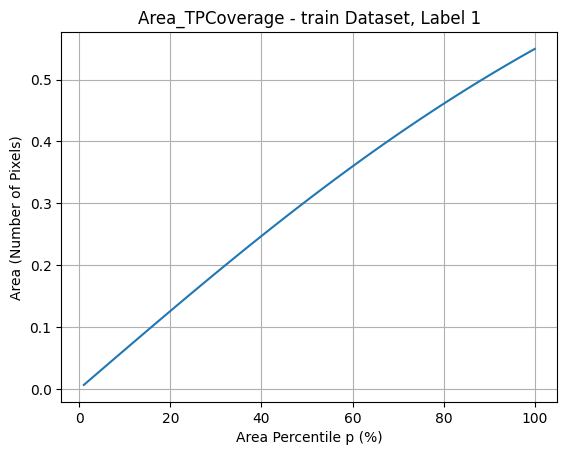

AUC: 0.29442509061162225


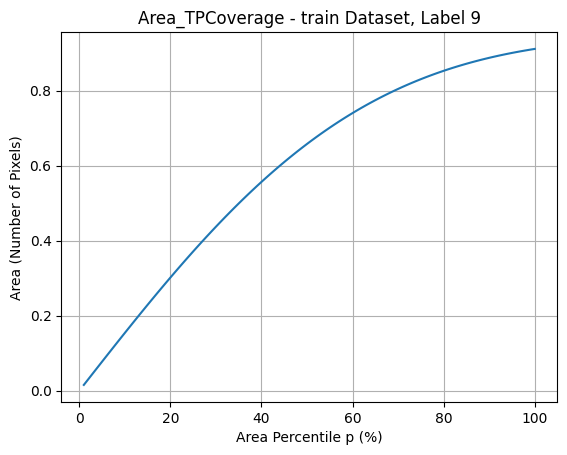

AUC: 0.5860605155199813


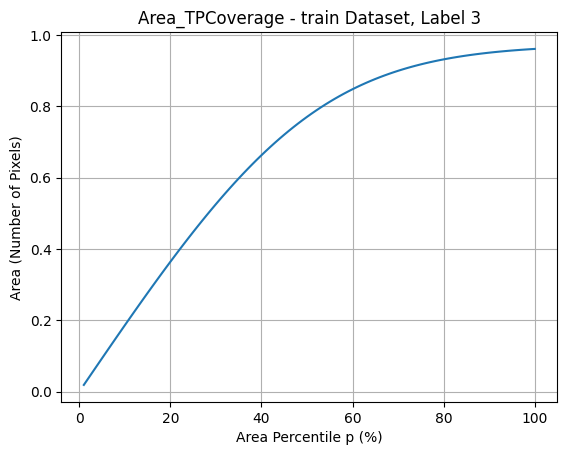

AUC: 0.6635067661679754


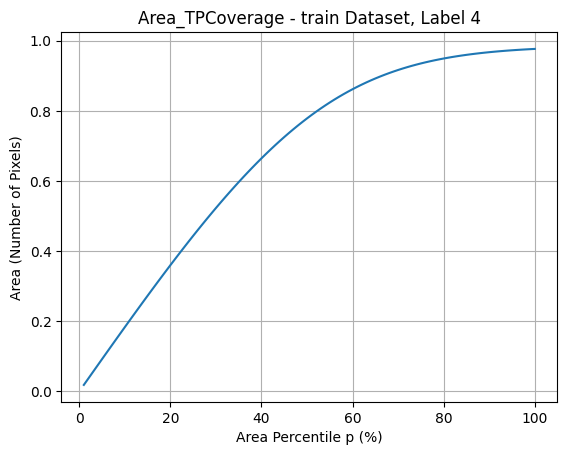

AUC: 0.6705453864104859


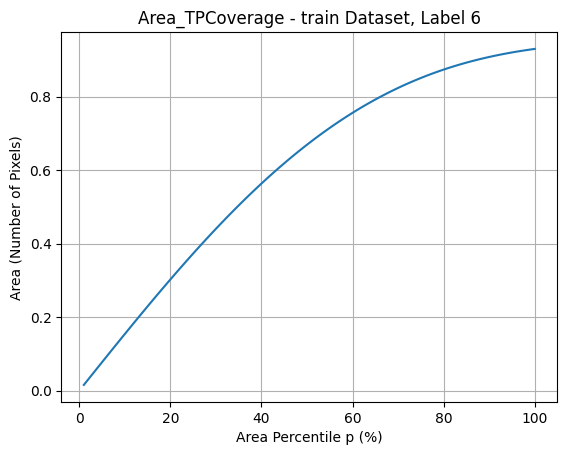

AUC: 0.5966539717681087


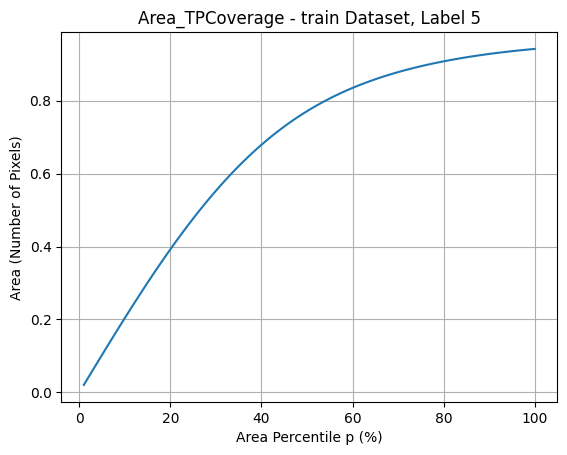

AUC: 0.6633181390994976


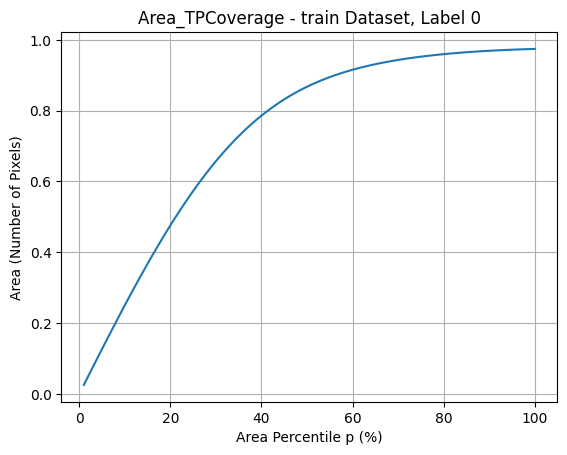

AUC: 0.7330226433788259


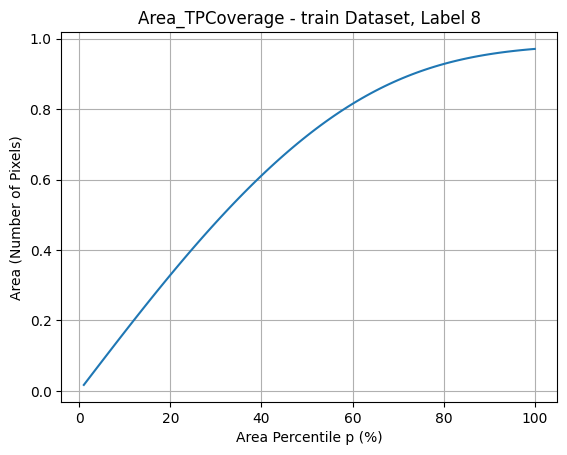

AUC: 0.6390485066430488


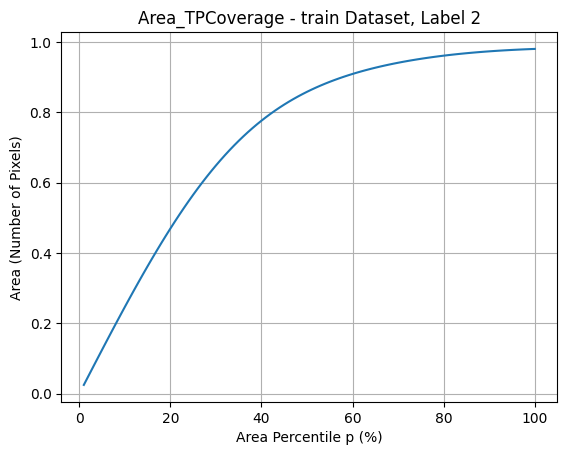

AUC: 0.7289405619978964


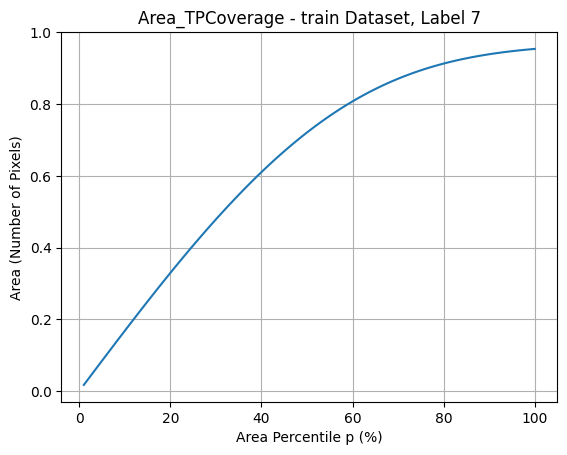

AUC: 0.632624688695768


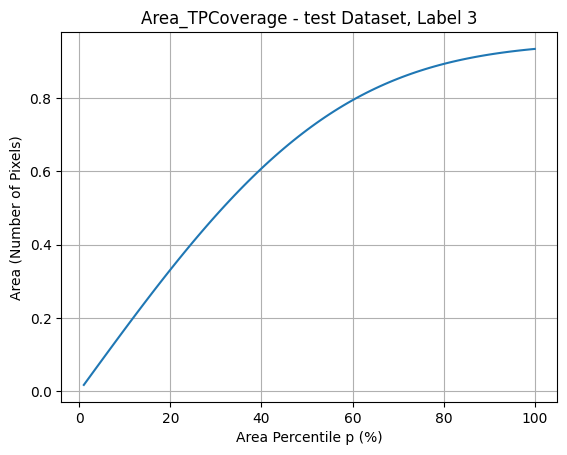

AUC: 0.6243485808292178


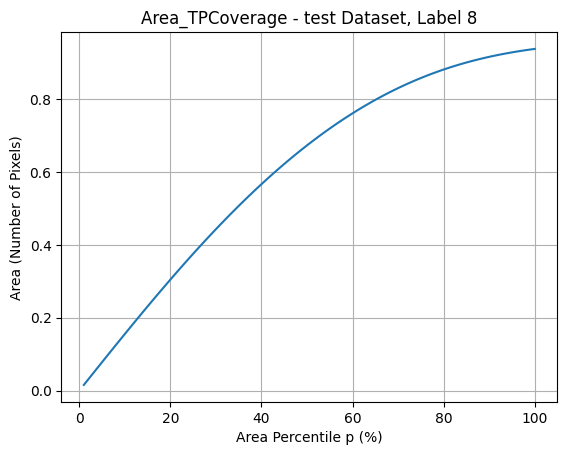

AUC: 0.6009127040632246


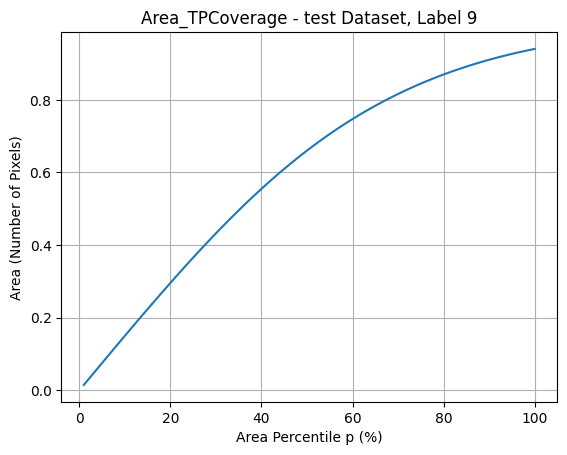

AUC: 0.5916516265211691


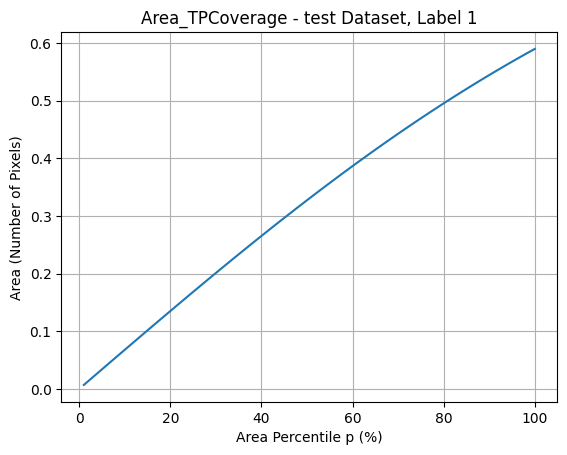

AUC: 0.3160808814247188


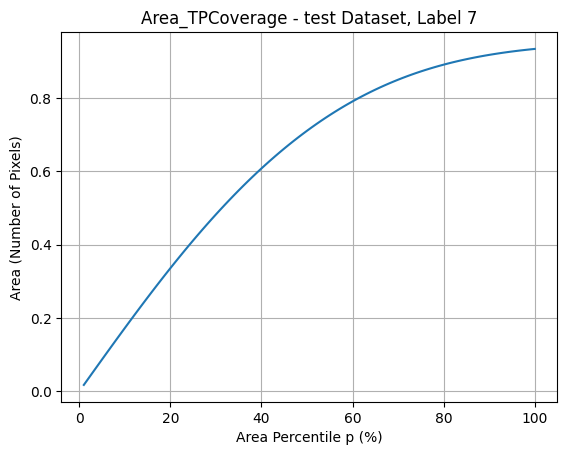

AUC: 0.6240213535693686


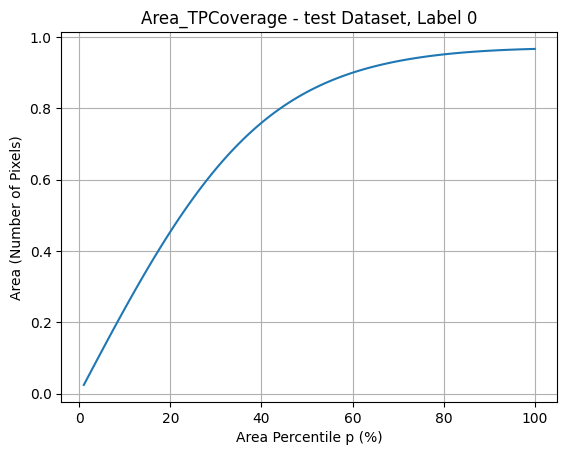

AUC: 0.7178602468689614


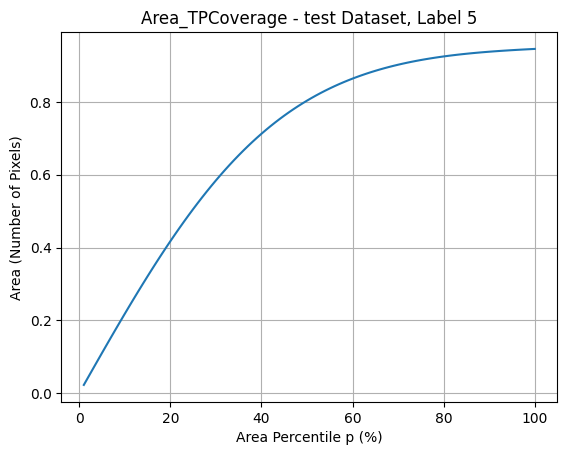

AUC: 0.6856795879899354


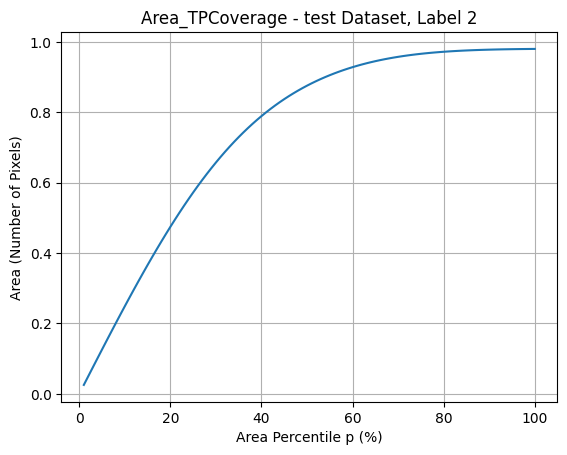

AUC: 0.7391688770062924


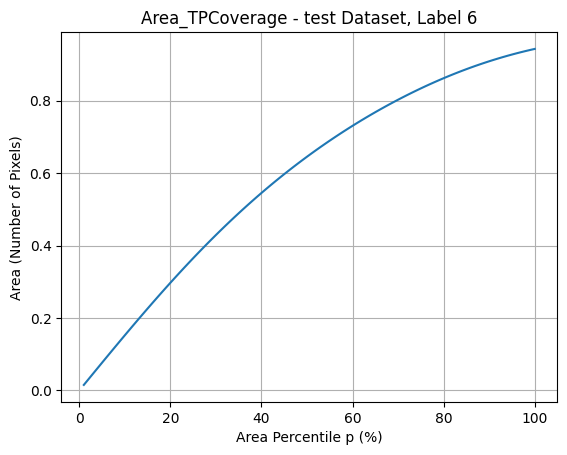

AUC: 0.5854536282955165


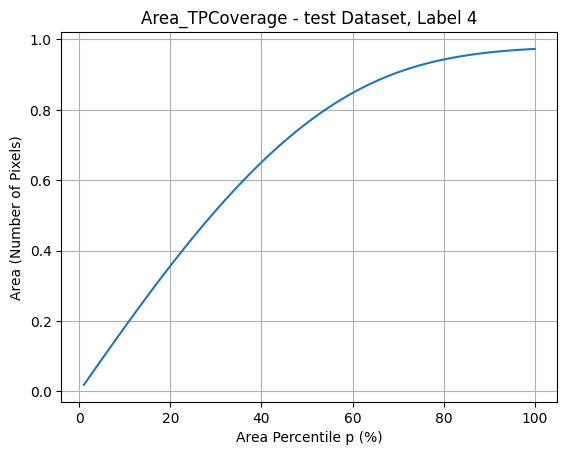

AUC: 0.6628009639426832


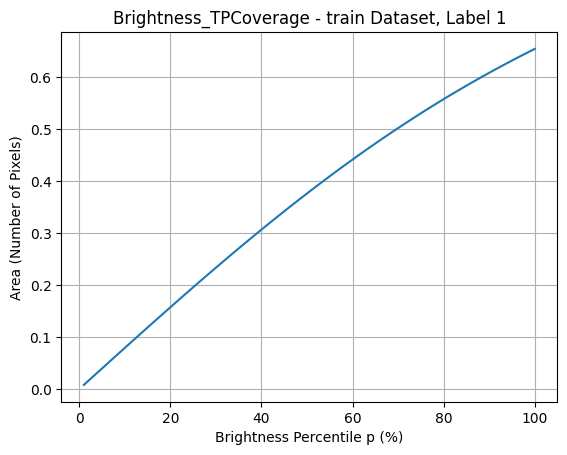

AUC: 0.3595478971304977


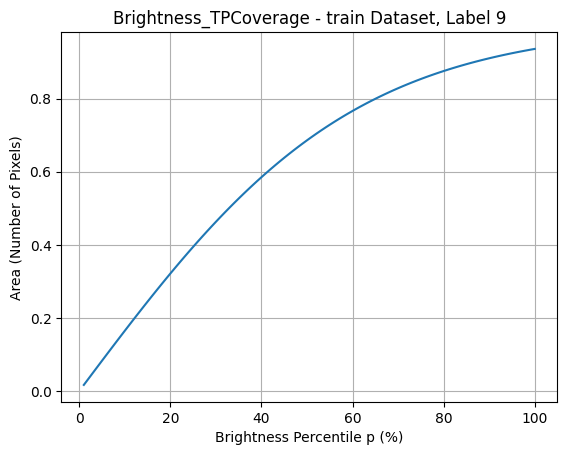

AUC: 0.6080787875033234


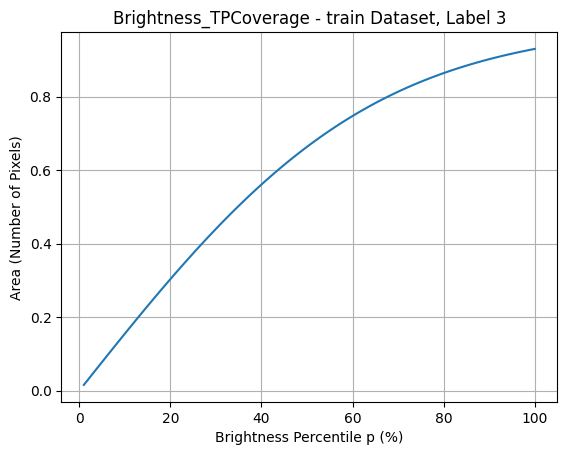

AUC: 0.5924838907777353


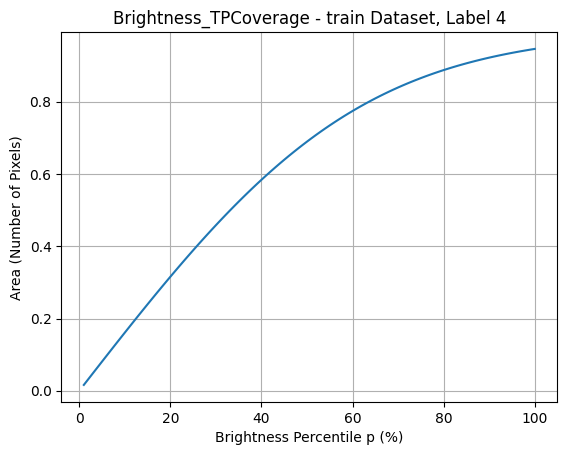

AUC: 0.6115269423020637


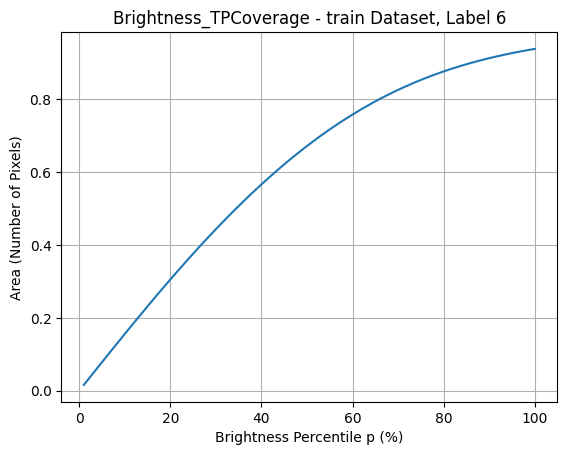

AUC: 0.599548906448356


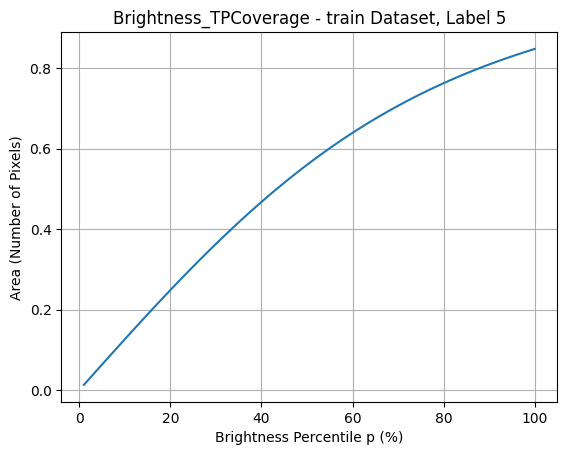

AUC: 0.5112310118014147


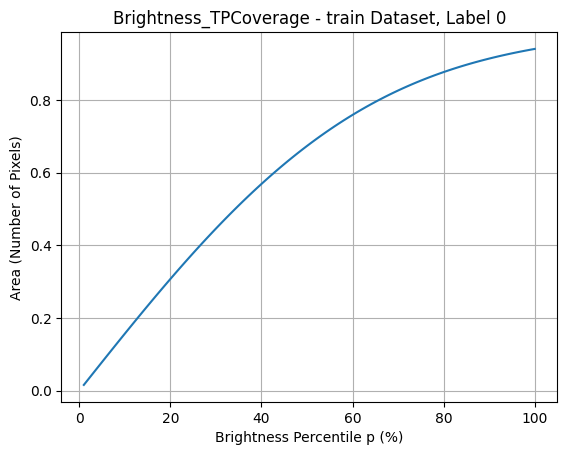

AUC: 0.6009043270787908


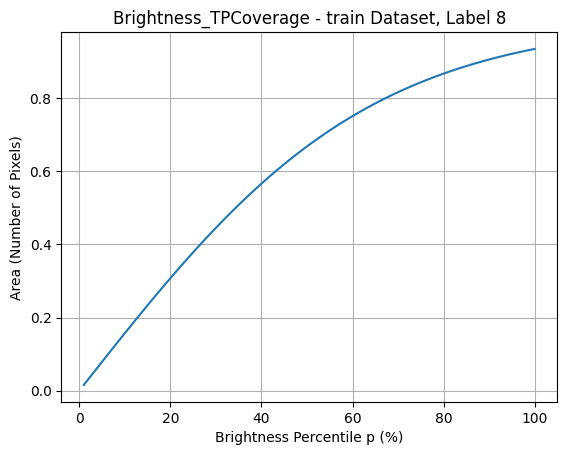

AUC: 0.5957433316059486


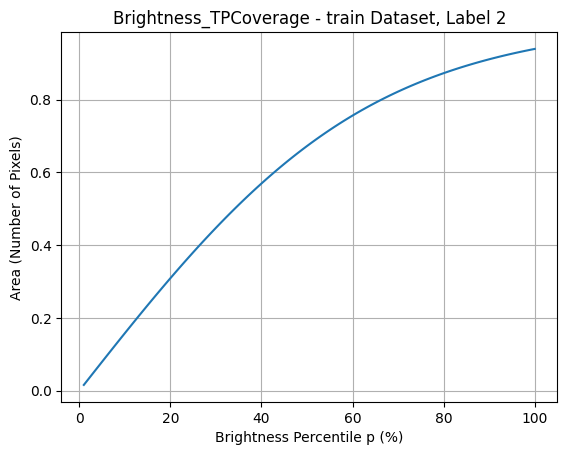

AUC: 0.5998658021510902


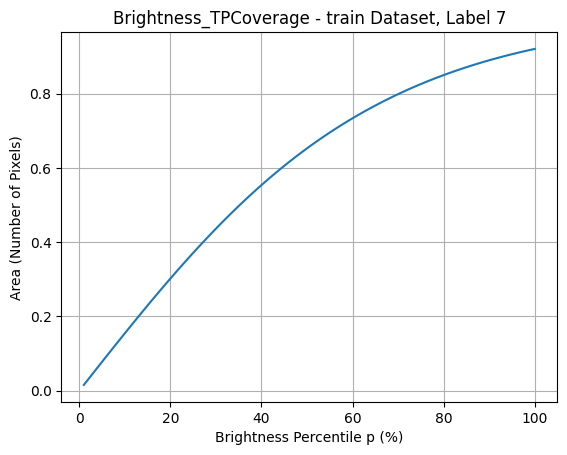

AUC: 0.5841585056218117


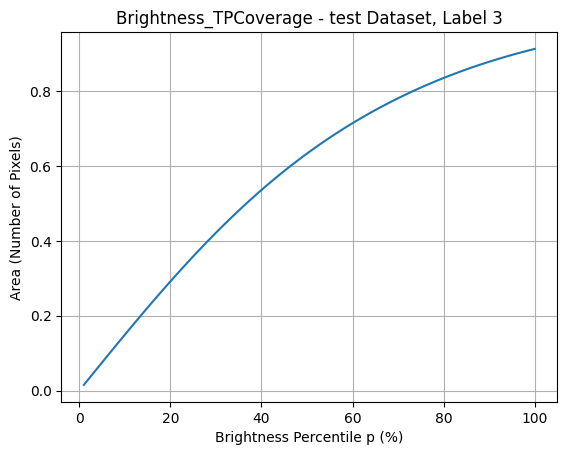

AUC: 0.5706934439334367


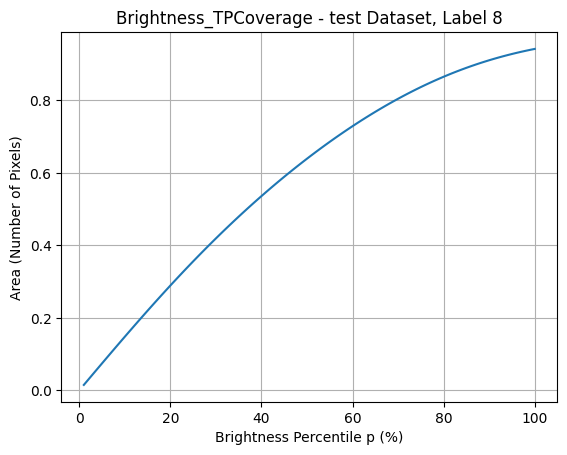

AUC: 0.5820753488511923


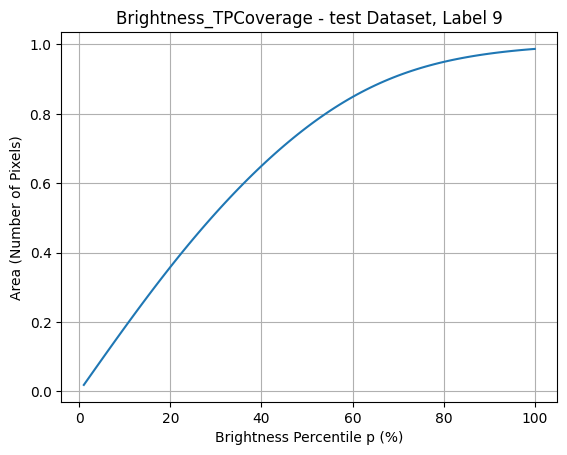

AUC: 0.6657785326040417


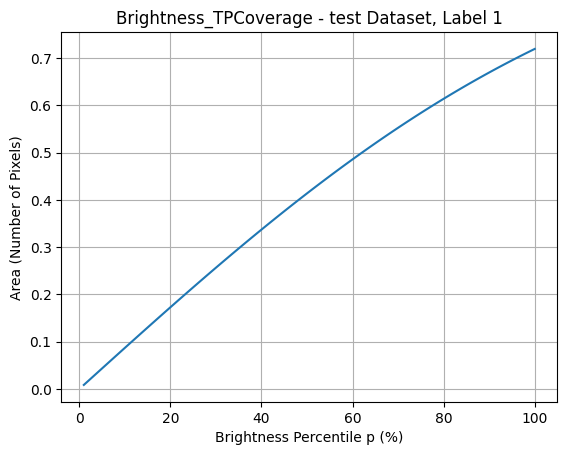

AUC: 0.3949704316732437


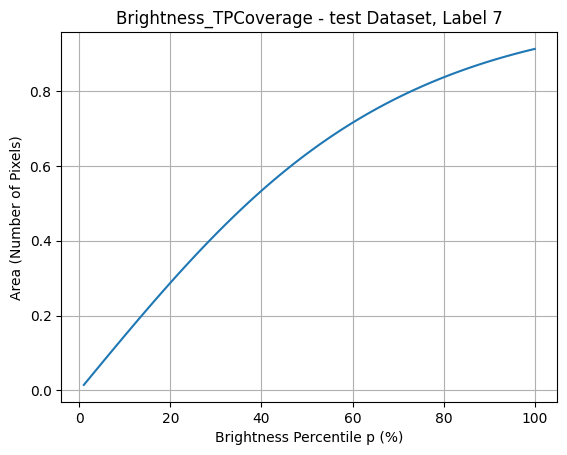

AUC: 0.5698418499556744


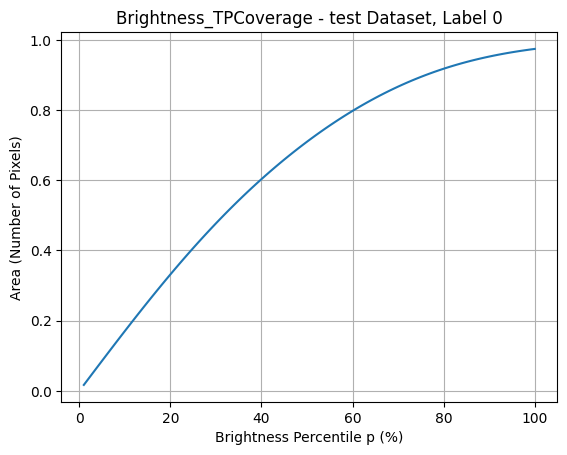

AUC: 0.6325359587314137


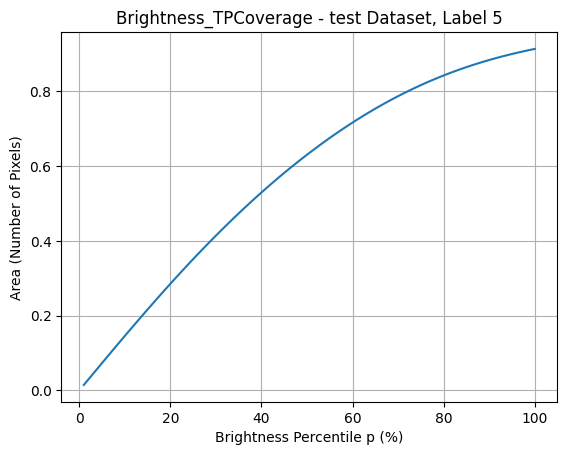

AUC: 0.570100688105377


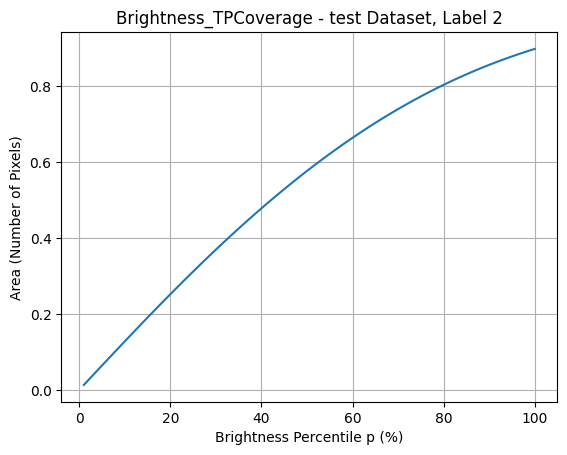

AUC: 0.5322953847511058


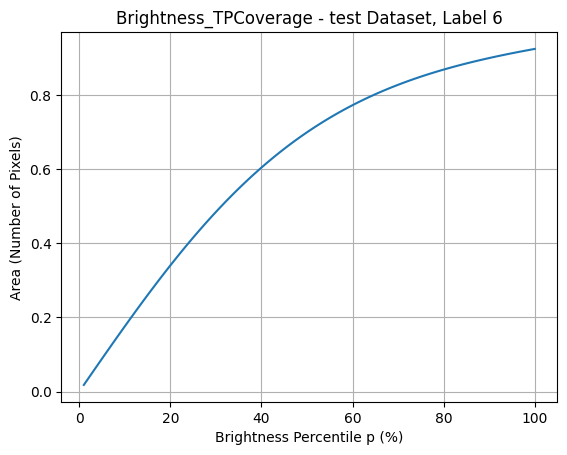

AUC: 0.6142438328820783


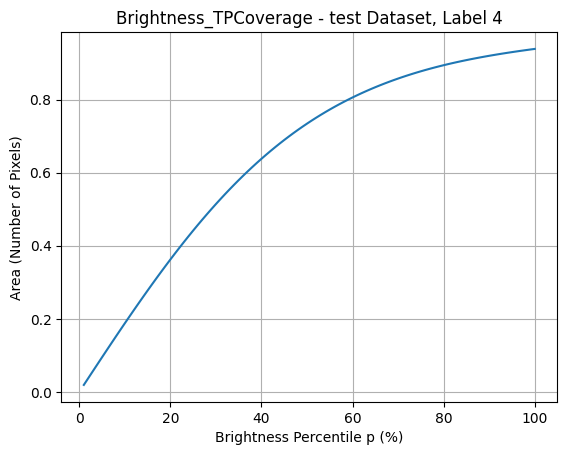

AUC: 0.6398171442454297


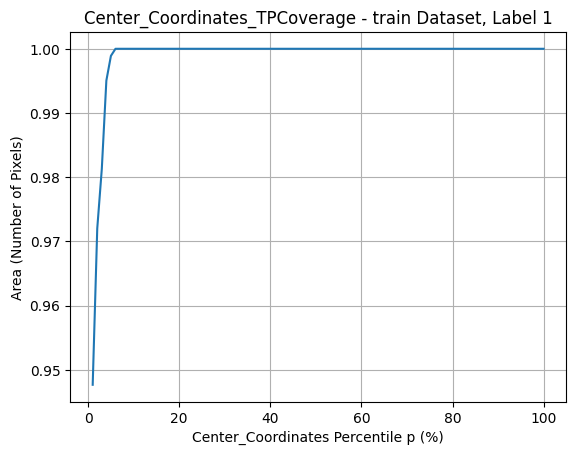

AUC: 0.9892108597620536


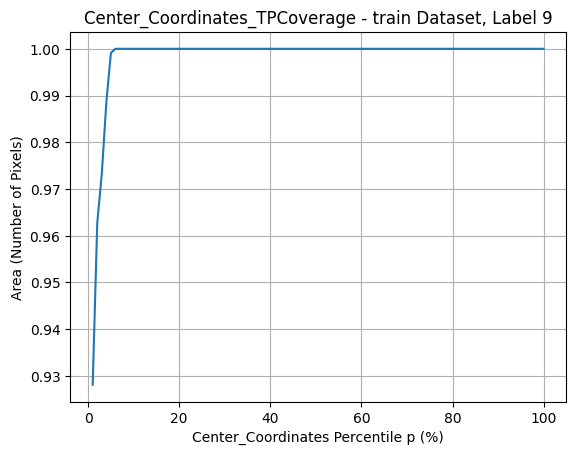

AUC: 0.9888785227199065


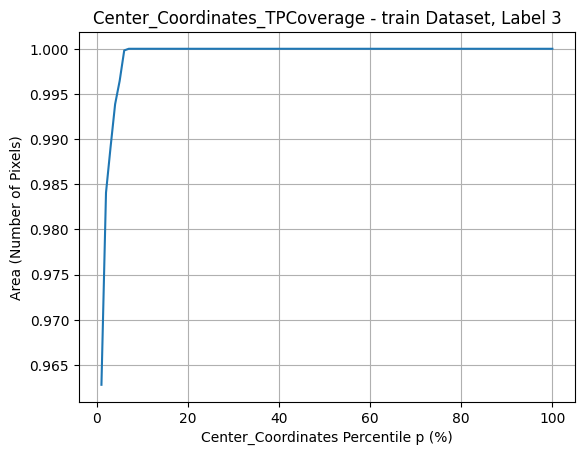

AUC: 0.9894469089544109


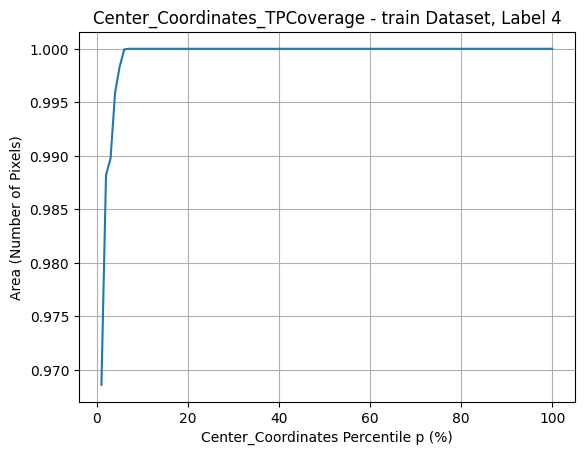

AUC: 0.9895643744966415


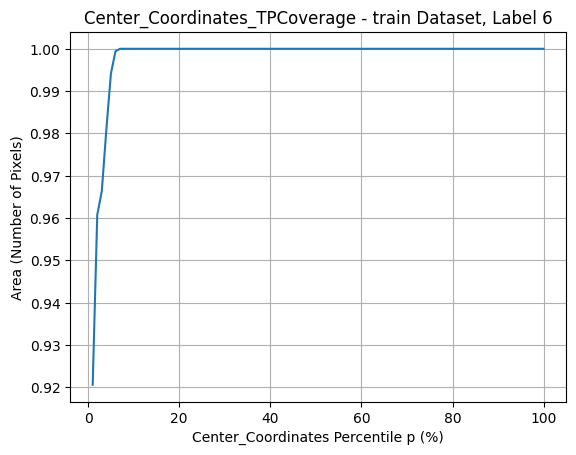

AUC: 0.9886202094688388


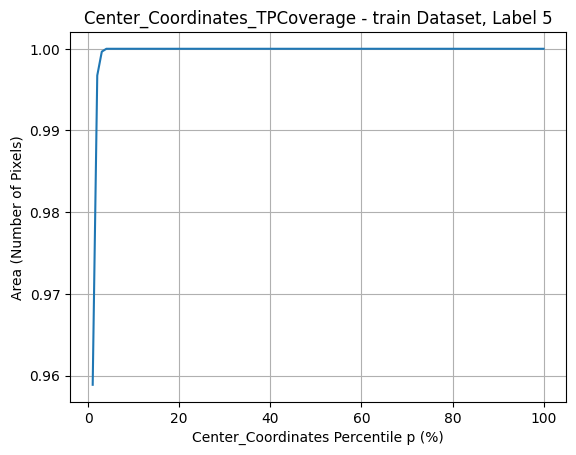

AUC: 0.9897582054700989


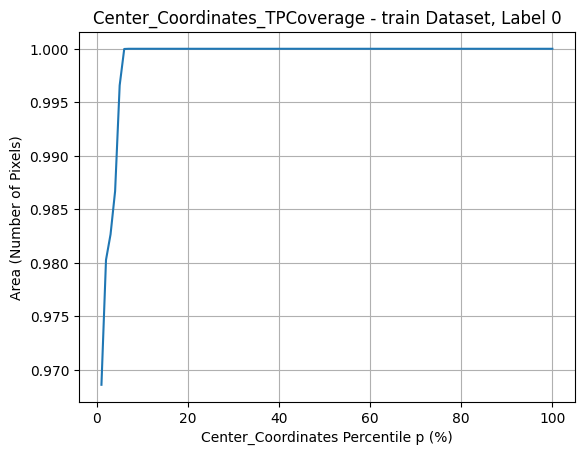

AUC: 0.9893053048646644


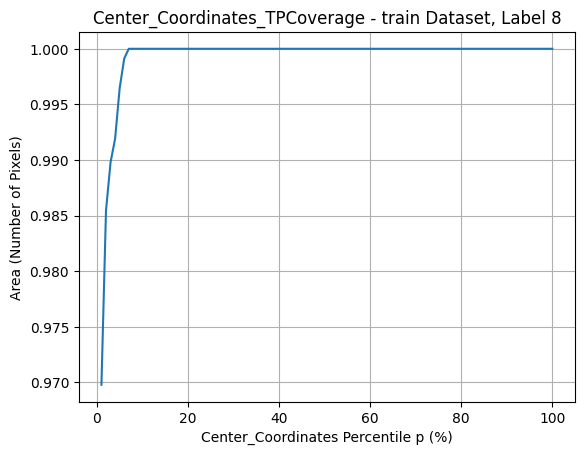

AUC: 0.9894765227232574


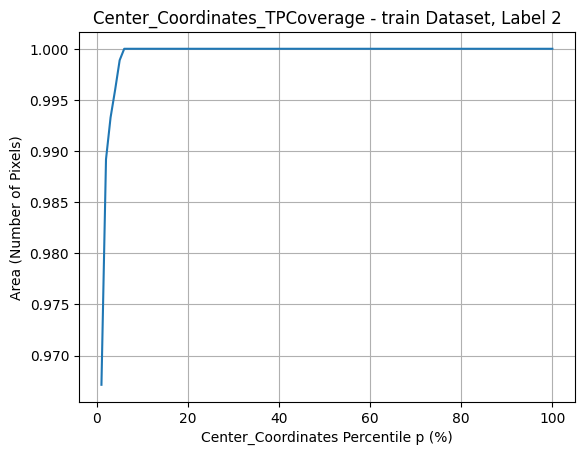

AUC: 0.9896088901830509


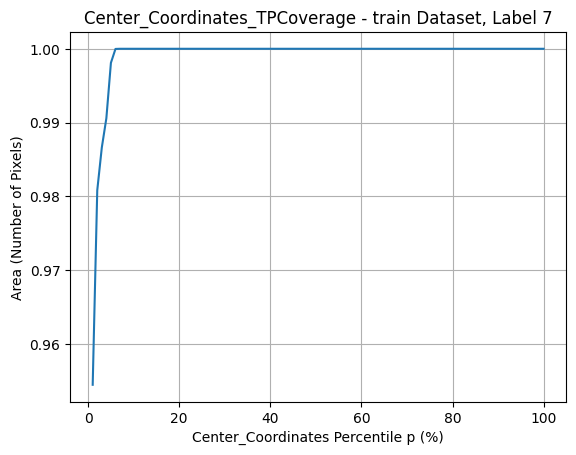

AUC: 0.9893331225859863


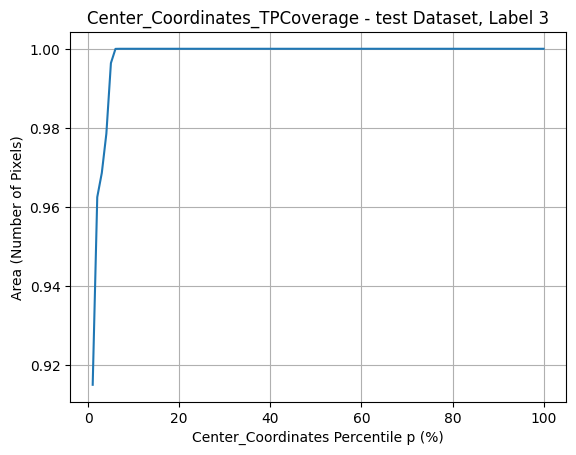

AUC: 0.9886339330805598


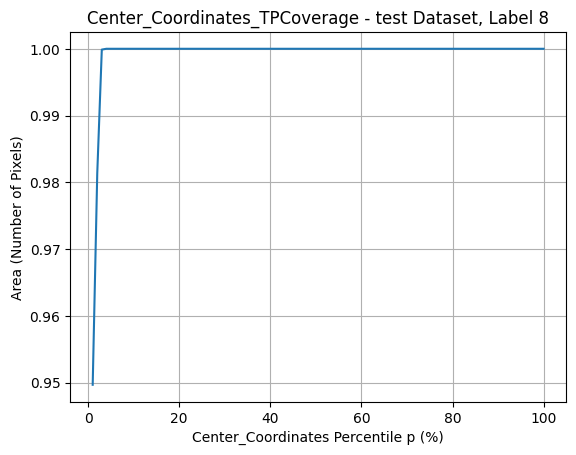

AUC: 0.989560538950827


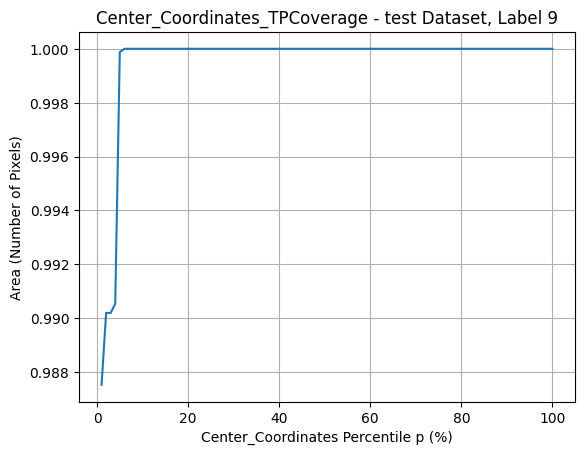

AUC: 0.98964564504428


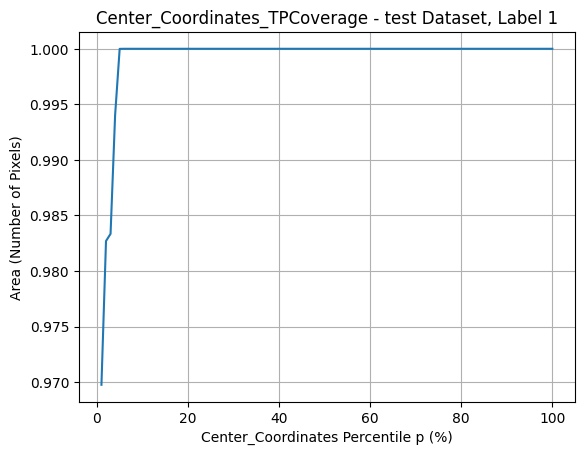

AUC: 0.9894495619751548


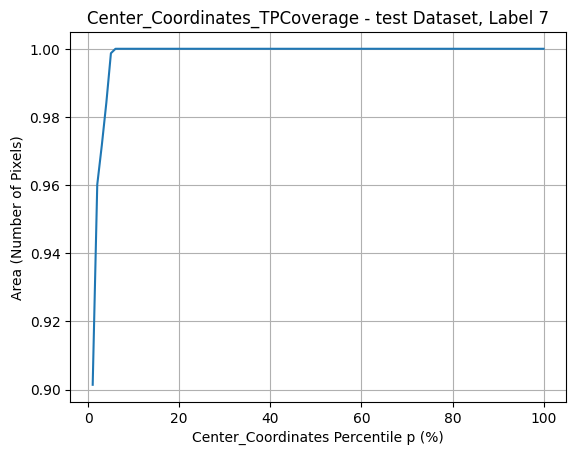

AUC: 0.9886542800282608


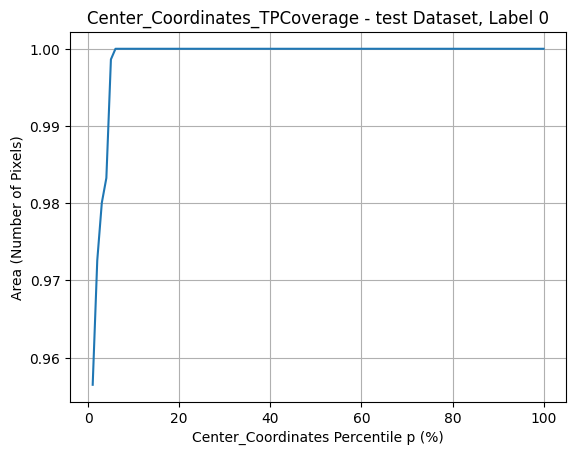

AUC: 0.9891277195068846


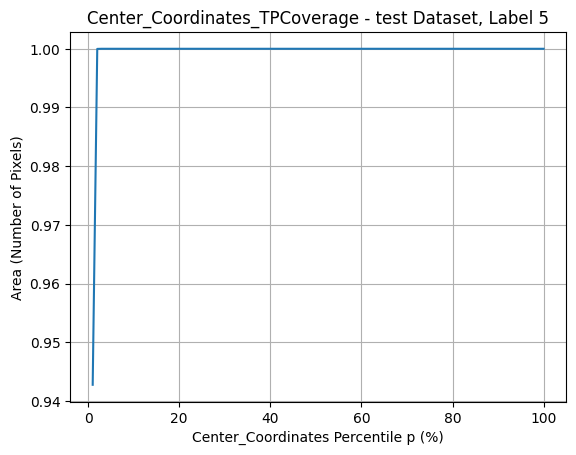

AUC: 0.9897134987199683


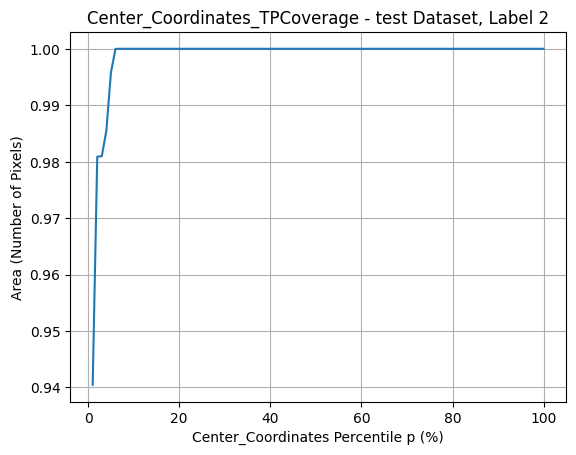

AUC: 0.9891332768665791


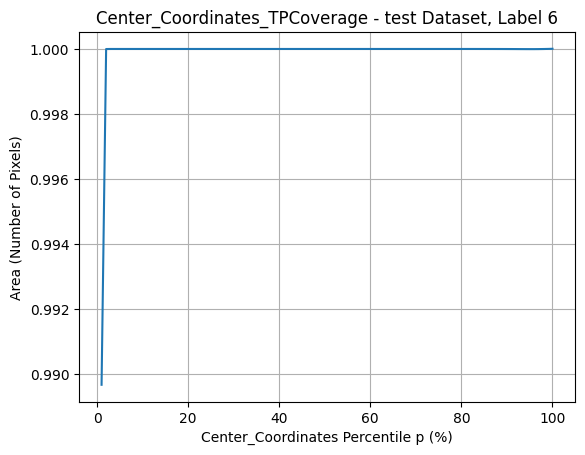

AUC: 0.9899480728685863


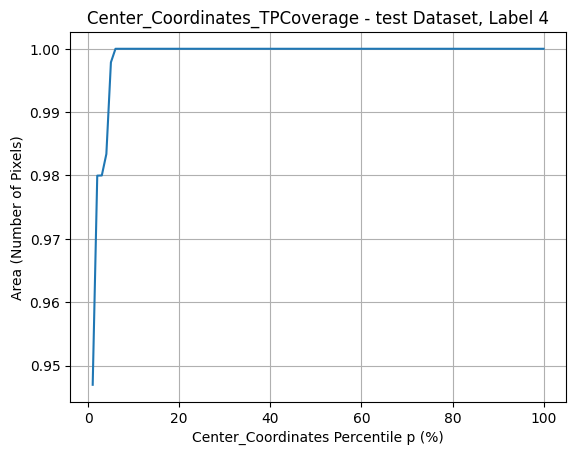

AUC: 0.9891471704754684


In [18]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [19]:
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [20]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
